In [1]:
# Import needed libraries

# %load_ext signature
%matplotlib inline

import requests
import helpers

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Setup SPARQL query
query = '''PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?president ?cause ?dob ?dod WHERE {
    ?pid wdt:P39 wd:Q11696 .
    ?pid wdt:P509 ?cid .
    ?pid wdt:P569 ?dob .
    ?pid wdt:P570 ?dod .

    OPTIONAL {
        ?pid rdfs:label ?president filter (lang(?president) = "en") .
    }
    OPTIONAL {
        ?cid rdfs:label ?cause filter (lang(?cause) = "en") .
    }
}'''

# Set datapath
#datapath = '/Users/jacobnorth/Box/extracurriculars/justice/datasets/'

# Create a pandas dataframe to view and manipulate the data with
#dataset = pd.read_csv(datapath+'datasets_596_1131_crime_data_w_population_and_crime_rate.csv')

In [3]:
url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
data = requests.get(url, params={'query': query, 'format': 'json'}).json()

In [4]:
presidents = []
for item in data['results']['bindings']:
    presidents.append({
        'name': item['president']['value'],
        'cause of death': item['cause']['value'],
        'date of birth': item['dob']['value'],
        'date of death': item['dod']['value']})

df = pd.DataFrame(presidents)
print(len(df))
df.head()

46


,name,cause of death,date of birth,date of death
0,Benjamin Harrison,influenza,1833-08-20T00:00:00Z,1901-03-13T00:00:00Z
1,Ronald Reagan,Alzheimer's disease,1911-02-06T00:00:00Z,2004-06-05T00:00:00Z
2,George H. W. Bush,Parkinson's disease,1924-06-12T00:00:00Z,2018-11-30T00:00:00Z
3,Zachary Taylor,cholera,1784-11-24T00:00:00Z,1850-07-09T00:00:00Z
4,James K. Polk,cholera,1795-11-02T00:00:00Z,1849-06-15T00:00:00Z


In [5]:
df.dtypes

name              object
cause of death    object
date of birth     object
date of death     object
dtype: object

In [8]:
df['date of birth'] = pd.to_datetime(df['date of birth'])
df['date of death'] = pd.to_datetime(df['date of death'])
df.sort_values(['date of birth', 'date of death'])

,name,cause of death,date of birth,date of death
36,George Washington,epiglottitis,1732-02-22 00:00:00+00:00,1799-12-14 00:00:00+00:00
27,John Adams,heart failure,1735-10-30 00:00:00+00:00,1826-07-04 00:00:00+00:00
44,Thomas Jefferson,uremia,1743-04-13 00:00:00+00:00,1826-07-04 00:00:00+00:00
26,James Madison,heart failure,1751-03-16 00:00:00+00:00,1836-06-28 00:00:00+00:00
19,James Monroe,tuberculosis,1758-04-28 00:00:00+00:00,1831-07-04 00:00:00+00:00
24,Andrew Jackson,heart failure,1767-03-15 00:00:00+00:00,1845-06-08 00:00:00+00:00
37,John Quincy Adams,cerebral hemorrhage,1767-07-11 00:00:00+00:00,1848-02-23 00:00:00+00:00
28,William Henry Harrison,sepsis,1773-02-09 00:00:00+00:00,1841-04-04 00:00:00+00:00
25,Martin Van Buren,heart failure,1782-12-05 00:00:00+00:00,1862-07-24 00:00:00+00:00
3,Zachary Taylor,cholera,1784-11-24 00:00:00+00:00,1850-07-09 00:00:00+00:00


Text(0, -1.16, 'Wikidata lists multiple causes of death for several presidents, that are all included. Thus the total count of causes is\nhigher than the number of US presidents who died. ')

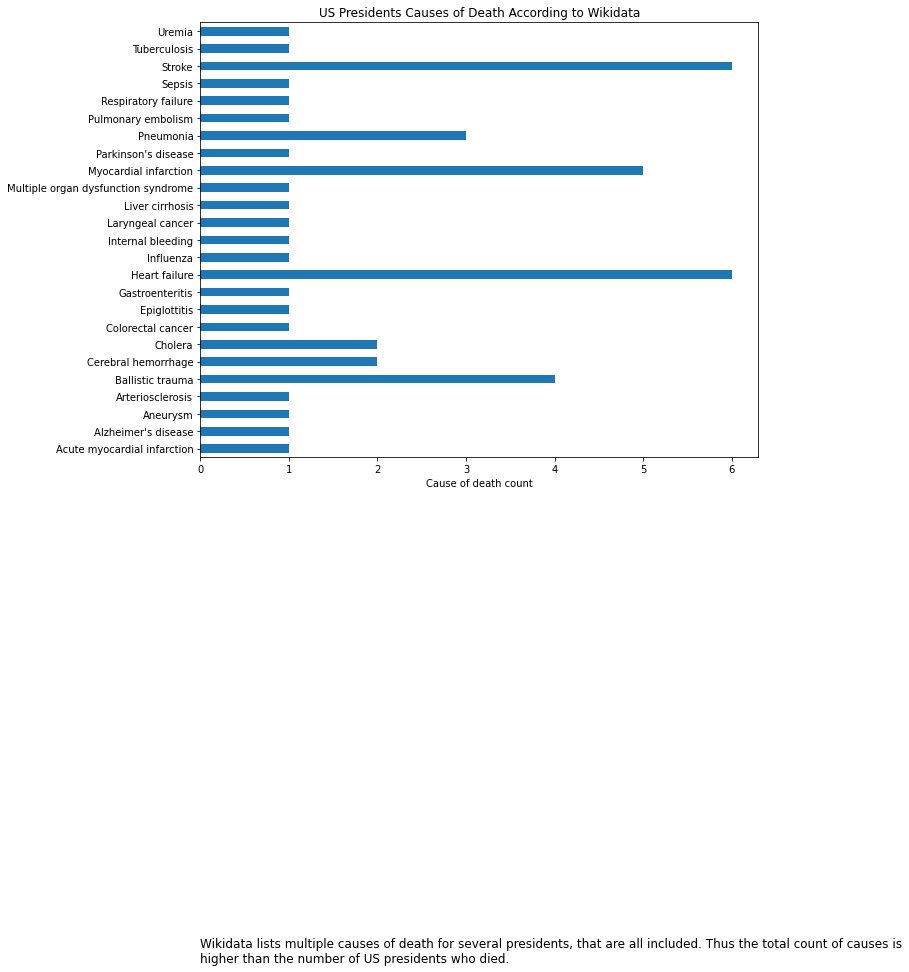

In [12]:
title = 'US Presidents Causes of Death According to Wikidata'
footer = '''Wikidata lists multiple causes of death for several presidents, that are all included. Thus the total count of causes is
higher than the number of US presidents who died. '''

df['cause of death'] = df['cause of death'].apply(lambda x: x.capitalize())
s = df.groupby('cause of death').agg('count')['name']

ax = s.plot(kind='barh', figsize=(10, 8), title=title)
ax.yaxis.set_label_text('')
ax.xaxis.set_label_text('Cause of death count')

ax.annotate(footer, xy=(0, -1.16), xycoords='axes fraction', fontsize=12)